In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Resources.2/world_anomalies_temp_data.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,Year,Value
0,1970,0.04
1,1971,-0.02
2,1972,-0.16
3,1973,0.34
4,1974,-0.18


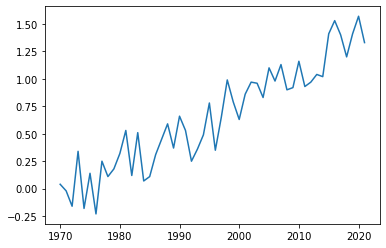

In [3]:
plt.plot(temp_anom_df['Year'],temp_anom_df['Value'])
plt.show()

In [4]:
temp_anom_df.set_index('Year',inplace = True)
temp_anom_df.head()

,Value
Year,
1970,0.04
1971,-0.02
1972,-0.16
1973,0.34
1974,-0.18


In [5]:
temp_anom_df= temp_anom_df.sort_values('Value',ascending=False)
temp_anom_df.head(10)

,Value
Year,
2020,1.57
2016,1.53
2019,1.41
2015,1.41
2017,1.40
2021,1.33
2018,1.20
2010,1.16
2007,1.13


In [6]:
temp_anom_df.describe()

,Value
count,52.000000
mean,0.652885
std,0.476307
min,-0.230000
25%,0.295000
50%,0.640000
75%,0.982500
max,1.570000


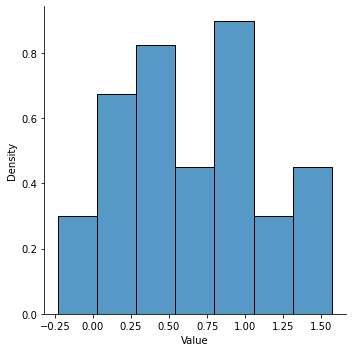

In [9]:
import seaborn as sb

# Extract feature we're interested in
data = temp_anom_df['Value']

# Generate histogram/distribution plot
sb.displot(data, stat="density")

plt.show()

Kernel density estimation plot. This plot is smooth and you don't lose any value when capturing ranges of values in containers. You can set a larger interval value, overlay a KDE graph on top of the histogram, and have all the relevant information on the screen.

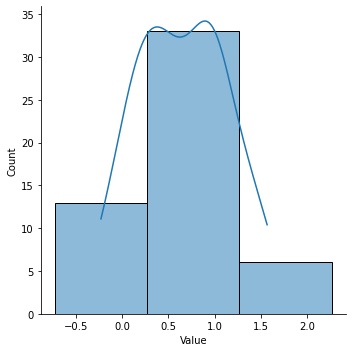

In [10]:
data = temp_anom_df['Value']

sb.displot(data, discrete = True, kde = True)

plt.show()

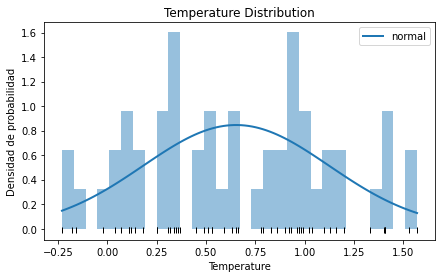

In [22]:
# Histogram
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('Temperature Distribution')
ax.set_xlabel('Temperature')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Q-Q (quantile-quantile) charts compare two probability distributions by plotting their quantiles against each other. A Q-Q plot is used to compare the shapes of distributions, providing a graphical view of how properties, such as location, scale, and skewness, are similar or different in the two distributions.

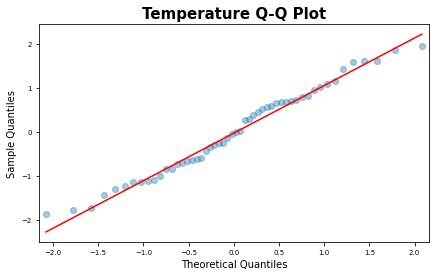

In [21]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Temperature Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Skewness and kurtosis statistics can be used to detect deviations from normality. 
A kurtosis value and/or skewness coefficient between -1 and 1 is generally considered a slight deviation from normality (Bulmer, 1979), (Brown, n.d.). Between -2 and 2 there is an obvious deviation from the normal but not extreme.

In [16]:
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: -0.9364723776129114
Skewness: 0.054993466453600204


In [17]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.9726374745368958, pvalue=0.2725185453891754)

There are not evidence to reject the nule hipotheses that the data is normally distributed.

In [18]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 4.344733832952063, p-value = 0.11390768760425639


There are not evidence to reject the nule hipotheses that the data is normally distributed.